In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_digits
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np

In [8]:
t = pd.read_csv('titanic.csv')
t.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [6]:
t['sex'].value_counts()

sex
male      843
female    466
Name: count, dtype: int64

In [7]:
t['fare'].mean()

33.29547928134557

In [11]:
tc = t['ticket'].value_counts()

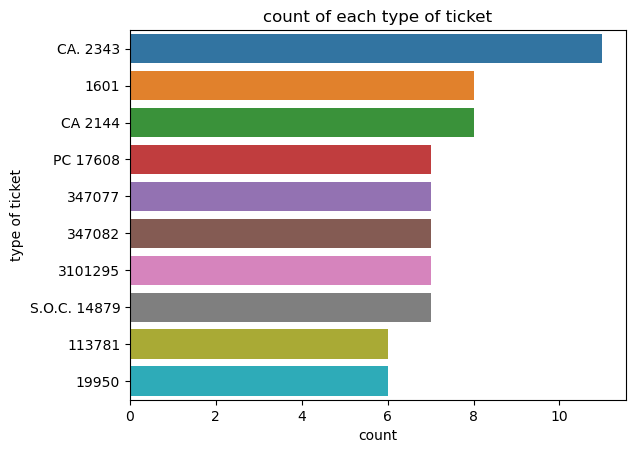

In [49]:
sns.countplot(data=t, y='ticket', order=t['ticket'].value_counts().index[:10])
plt.title('count of each type of ticket')
plt.xlabel('count')
plt.ylabel('type of ticket')
plt.show()

In [16]:
t[t['sex'] == 'male']

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.00,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.00,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.00,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1302,3,0,"Yousif, Mr. Wazli",male,NaN,0,0,2647,7.2250,NaN,C,NaN,NaN,NaN
1303,3,0,"Yousseff, Mr. Gerious",male,NaN,0,0,2627,14.4583,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.50,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.00,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [17]:
t[t['sex'] == 'female']

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1286,3,1,"Whabee, Mrs. George Joseph (Shawneene Abi-Saab)",female,38.0,0,0,2688,7.2292,NaN,C,C,NaN,NaN
1290,3,1,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,NaN,NaN,NaN
1300,3,1,"Yasbeck, Mrs. Antoni (Selini Alexander)",female,15.0,1,0,2659,14.4542,NaN,C,NaN,NaN,NaN
1304,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN


In [23]:
min_dest = t['home.dest'].value_counts().idxmin()
min_count = t['home.dest'].value_counts().min()
print(f'Least populated: {min_dest} : {min_count}')

Least populated: Liverpool, England / Belfast : 1


In [24]:
max_dest = t['home.dest'].value_counts().idxmax()
max_count = t['home.dest'].value_counts().max()
print(f'Most populated: {max_dest} : {max_count}')

Most populated: New York, NY : 64


In [26]:
print('total number of sibling/spouse : ', t['sibsp'].sum())
print('total number of parent/children : ', t['parch'].sum())


total number of sibling/spouse :  653
total number of parent/children :  504


In [37]:
t['embarked2'] = t['embarked'].astype('category').cat.codes
t['embarked2']

0       2
1       2
2       2
3       2
4       2
       ..
1304    0
1305    0
1306    0
1307    0
1308    2
Name: embarked2, Length: 1309, dtype: int8

In [38]:
print('correlation of survived with embarked : ',t['survived'].corr(t['embarked2']))

correlation of survived with embarked :  -0.18123768968090134


In [39]:
print('correlation of embarked with pclass : ',t['embarked2'].corr(t['pclass']))

correlation of embarked with pclass :  0.19286723489388222


In [40]:
t['sex2'] = t['sex'].map({'male': 0, 'female': 1})
t['sex2']

0       1
1       0
2       1
3       0
4       1
       ..
1304    1
1305    1
1306    0
1307    0
1308    0
Name: sex2, Length: 1309, dtype: int64

In [41]:
print('correlation of embarked with sex : ',t['embarked2'].corr(t['sex2']))

correlation of embarked with sex :  -0.10481799211163377
